<a href="https://colab.research.google.com/github/Zzl85199/amazon_product/blob/main/amazon_product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Kaggle/amazon_product.csv')
df.head()

,Unnamed: 0,asin,product_title,product_price,product_original_price,currency,product_star_rating,product_num_ratings,product_url,product_photo,...,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,has_variations,product_availability,unit_price,unit_count
0,0,B0BQ118F2T,Moto G Play 2023 3-Day Battery Unlocked Made f...,$99.99,$169.99,USD,4.0,2929,https://www.amazon.com/dp/B0BQ118F2T,https://m.media-amazon.com/images/I/61K1Fz5Lxv...,...,False,False,True,False,6K+ bought in past month,"FREE delivery Tue, Aug 6",True,NaN,NaN,NaN
1,1,B0CTD47P22,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...",$149.74,$158.00,USD,4.2,135,https://www.amazon.com/dp/B0CTD47P22,https://m.media-amazon.com/images/I/51QhB2CfqS...,...,False,False,True,False,3K+ bought in past month,"FREE delivery Wed, Aug 7 Only 7 left in stock ...",False,Only 7 left in stock - order soon.,NaN,NaN
2,2,B0CHH6X6H2,Total by Verizon | Samsung Galaxy A03s | Locke...,$49.88,NaN,USD,3.9,205,https://www.amazon.com/dp/B0CHH6X6H2,https://m.media-amazon.com/images/I/812woqv69C...,...,False,False,True,False,2K+ bought in past month,"FREE delivery Tue, Aug 6",False,NaN,NaN,NaN
3,3,B0BZ9XNBRB,Google Pixel 7a - Unlocked Android Cell Phone ...,$335.00,$499.00,USD,4.3,2248,https://www.amazon.com/dp/B0BZ9XNBRB,https://m.media-amazon.com/images/I/61r7cCpQPl...,...,False,False,False,False,10K+ bought in past month,FREE delivery Aug 6 - 8,True,NaN,NaN,NaN
4,4,B0CN1QSH8Q,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",$199.99,NaN,USD,4.1,423,https://www.amazon.com/dp/B0CN1QSH8Q,https://m.media-amazon.com/images/I/61s0ZzwzSC...,...,False,False,True,True,3K+ bought in past month,"FREE delivery Tue, Aug 6",True,NaN,NaN,NaN


In [ ]:
df.tail()

,Unnamed: 0,asin,product_title,product_price,product_original_price,currency,product_star_rating,product_num_ratings,product_url,product_photo,...,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,has_variations,product_availability,unit_price,unit_count
59,59,B0D6LWXK1R,Greatish Hits: I Followed My Dreams and My Dre...,$34.98,NaN,USD,NaN,0,https://www.amazon.com/dp/B0D6LWXK1R,https://m.media-amazon.com/images/I/815otxMW0i...,...,False,False,False,False,50+ bought in past month,FREE delivery on $35 shipped by Amazon.This ti...,False,NaN,NaN,NaN
60,60,B0CLKQF5HR,Swan Song,$14.99,$30.00,USD,4.4,14471,https://www.amazon.com/dp/B0CLKQF5HR,https://m.media-amazon.com/images/I/71dSn3QCY6...,...,True,False,False,False,Print List Price:,Available instantly,False,NaN,NaN,NaN
61,61,B0BZFHK12K,Bluey: Let&#x27;s Play!,$0.00,NaN,USD,3.5,270,https://www.amazon.com/dp/B0BZFHK12K,https://m.media-amazon.com/images/I/617GUqQEIC...,...,False,False,False,False,"Jul 7, 2023",Available instantly on compatible devices,False,NaN,NaN,NaN
62,62,B09Z7J4L6X,Xbox Wireless Controller – Sky Cipher Special ...,$69.99,NaN,USD,2.6,12,https://www.amazon.com/dp/B09Z7J4L6X,https://m.media-amazon.com/images/I/71i2tEKlZ2...,...,True,False,False,False,"Aug 13, 2024",FREE deliveryThis item will be released on Aug...,False,NaN,NaN,NaN
63,63,B0CT2R7199,HP DeskJet 2855e Wireless All-in-One Color Ink...,$59.99,$84.99,USD,4.0,48154,https://www.amazon.com/dp/B0CT2R7199,https://m.media-amazon.com/images/I/61+biEwB1h...,...,True,False,False,True,80K+ bought in past month,FREE delivery,False,NaN,NaN,NaN


In [ ]:
df.shape

(64, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   64 non-null     int64  
 1   asin                         64 non-null     object 
 2   product_title                64 non-null     object 
 3   product_price                64 non-null     object 
 4   product_original_price       27 non-null     object 
 5   currency                     64 non-null     object 
 6   product_star_rating          54 non-null     float64
 7   product_num_ratings          64 non-null     int64  
 8   product_url                  64 non-null     object 
 9   product_photo                64 non-null     object 
 10  product_num_offers           64 non-null     int64  
 11  product_minimum_offer_price  64 non-null     object 
 12  is_best_seller               64 non-null     bool   
 13  is_amazon_choice      

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,64.0,31.500000,18.618987,0.0,15.75,31.5,47.25,63.0
product_star_rating,54.0,4.244444,0.558187,1.8,4.10,4.4,4.60,4.8
product_num_ratings,64.0,52101.640625,157685.541926,0.0,47.75,967.5,13846.25,1015448.0
product_num_offers,64.0,4.859375,8.145243,1.0,1.00,1.0,4.00,34.0
unit_count,5.0,15.200000,25.390943,0.0,2.00,3.0,11.00,60.0


<Axes: >

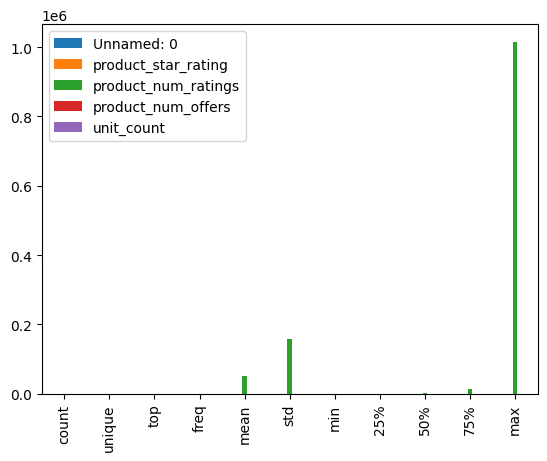

In [ ]:
df.describe(include='all').plot(kind='bar')

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined
numeric_df = df.select_dtypes(include=[float, int])

correlation_matrix = numeric_df.corr()

fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto",
                title='Correlation Matrix',
                color_continuous_scale='RdBu_r')
fig.show()

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
asin,0
product_title,0
product_price,0
product_original_price,37
currency,0
product_star_rating,10
product_num_ratings,0
product_url,0
product_photo,0


In [ ]:
df=df.fillna(0)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns.tolist()

['Unnamed: 0',
 'asin',
 'product_title',
 'product_price',
 'product_original_price',
 'currency',
 'product_star_rating',
 'product_num_ratings',
 'product_url',
 'product_photo',
 'product_num_offers',
 'product_minimum_offer_price',
 'is_best_seller',
 'is_amazon_choice',
 'is_prime',
 'climate_pledge_friendly',
 'sales_volume',
 'delivery',
 'has_variations',
 'product_availability',
 'unit_price',
 'unit_count']

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined and contains the data

# Define the columns you want to plot
columns = ['Unnamed: 0',
 'asin',
 'product_title',
 'product_price',
 'product_original_price',
 'currency',
 'product_star_rating',
 'product_num_ratings',
 'product_url',
 'product_photo',
 'product_num_offers',
 'product_minimum_offer_price',
 'is_best_seller',
 'is_amazon_choice',
 'is_prime',
 'climate_pledge_friendly',
 'sales_volume',
 'delivery',
 'has_variations',
 'product_availability',
 'unit_price',
 'unit_count']

# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue

        # Check if the column is suitable for a bar chart
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']

            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',

                labels={column: column, 'count': 'Count'},
                text='count'
            )

            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),

                xaxis={'categoryorder': 'total descending'}


            )

            # Show the figure
            fig.show()

        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )

            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',

                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )

            # Show the figure
            fig.show()

    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")

In [ ]:
df

,Unnamed: 0,asin,product_title,product_price,product_original_price,currency,product_star_rating,product_num_ratings,product_url,product_photo,...,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,has_variations,product_availability,unit_price,unit_count
0,0,B0BQ118F2T,Moto G Play 2023 3-Day Battery Unlocked Made f...,$99.99,$169.99,USD,4.0,2929,https://www.amazon.com/dp/B0BQ118F2T,https://m.media-amazon.com/images/I/61K1Fz5Lxv...,...,False,False,True,False,6K+ bought in past month,"FREE delivery Tue, Aug 6",True,0,0,0.0
1,1,B0CTD47P22,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...",$149.74,$158.00,USD,4.2,135,https://www.amazon.com/dp/B0CTD47P22,https://m.media-amazon.com/images/I/51QhB2CfqS...,...,False,False,True,False,3K+ bought in past month,"FREE delivery Wed, Aug 7 Only 7 left in stock ...",False,Only 7 left in stock - order soon.,0,0.0
2,2,B0CHH6X6H2,Total by Verizon | Samsung Galaxy A03s | Locke...,$49.88,0,USD,3.9,205,https://www.amazon.com/dp/B0CHH6X6H2,https://m.media-amazon.com/images/I/812woqv69C...,...,False,False,True,False,2K+ bought in past month,"FREE delivery Tue, Aug 6",False,0,0,0.0
3,3,B0BZ9XNBRB,Google Pixel 7a - Unlocked Android Cell Phone ...,$335.00,$499.00,USD,4.3,2248,https://www.amazon.com/dp/B0BZ9XNBRB,https://m.media-amazon.com/images/I/61r7cCpQPl...,...,False,False,False,False,10K+ bought in past month,FREE delivery Aug 6 - 8,True,0,0,0.0
4,4,B0CN1QSH8Q,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",$199.99,0,USD,4.1,423,https://www.amazon.com/dp/B0CN1QSH8Q,https://m.media-amazon.com/images/I/61s0ZzwzSC...,...,False,False,True,True,3K+ bought in past month,"FREE delivery Tue, Aug 6",True,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,B0D6LWXK1R,Greatish Hits: I Followed My Dreams and My Dre...,$34.98,0,USD,0.0,0,https://www.amazon.com/dp/B0D6LWXK1R,https://m.media-amazon.com/images/I/815otxMW0i...,...,False,False,False,False,50+ bought in past month,FREE delivery on $35 shipped by Amazon.This ti...,False,0,0,0.0
60,60,B0CLKQF5HR,Swan Song,$14.99,$30.00,USD,4.4,14471,https://www.amazon.com/dp/B0CLKQF5HR,https://m.media-amazon.com/images/I/71dSn3QCY6...,...,True,False,False,False,Print List Price:,Available instantly,False,0,0,0.0
61,61,B0BZFHK12K,Bluey: Let&#x27;s Play!,$0.00,0,USD,3.5,270,https://www.amazon.com/dp/B0BZFHK12K,https://m.media-amazon.com/images/I/617GUqQEIC...,...,False,False,False,False,"Jul 7, 2023",Available instantly on compatible devices,False,0,0,0.0
62,62,B09Z7J4L6X,Xbox Wireless Controller – Sky Cipher Special ...,$69.99,0,USD,2.6,12,https://www.amazon.com/dp/B09Z7J4L6X,https://m.media-amazon.com/images/I/71i2tEKlZ2...,...,True,False,False,False,"Aug 13, 2024",FREE deliveryThis item will be released on Aug...,False,0,0,0.0
